In [1]:
import calendar
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sqlalchemy

from database_credentials import get_database_url

In [2]:
def get_mean_rating_for_month(data, month):
    """Get the mean rating for the given month
    
    Args:
        data (dataframe): contains review data
        
    Returns:
        mean_rating (float): mean rating for the month
    """
    
    mean_rating = data.loc[data['month'] == month, 'rating'].mean()
    return mean_rating

In [3]:
database_url = get_database_url()
engine = sqlalchemy.create_engine(database_url)
connection = engine.connect()

In [4]:
review_query = '''
    SELECT *
    FROM reviews;
'''

review_data = pd.read_sql(review_query, connection)

In [5]:
display(review_data.head(3))

print("Shape:", review_data.shape)
print("\nColumns:", review_data.columns.values)
print("\nColumn missing values:\n", review_data.isna().any(), sep='')

ratings = review_data['rating']
print("\nDescriptive Statistics for Rating:\n", ratings.describe(), sep='')

datetime_created = review_data['datetime_created']
print("\nDatetime Created: {} to {}".format(datetime_created.min(), datetime_created.max()))

user_id                                             review  \
0  Eleanor Abigail Darryko  This game is pretty great. The rest of the adv...   
1               Noel Tulip  I love this game it's filled with adventure an...   
2                 ikan ayu                              This game is beutiful   

   rating         version    datetime_created  
0       5  0.9.7 (150719) 2020-06-27 21:59:56  
1       5  0.9.5 (150178) 2020-06-27 21:54:23  
2       5  0.9.7 (150719) 2020-06-27 21:37:36

Shape: (20000, 5)

Columns: ['user_id' 'review' 'rating' 'version' 'datetime_created']

Column missing values:
user_id             False
review              False
rating              False
version              True
datetime_created    False
dtype: bool

Descriptive Statistics for Rating:
count    20000.000000
mean         4.500800
std          1.044775
min          1.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

Datetime Created: 2020-04-10 23:06:39 to 2020-06-27 21:59:56


Summary:
- 20,000 rows with 5 columns 
- some reviews are not associated with any version of the game
- mean rating of 4.5 out of 5 along with the percentiles indicate a large number of positive ratings
- review data ranges from April to June

It is important to note that there may be bias due to how reviews are only from the Google Play Store and were fetched based on Google's most relevant filter.

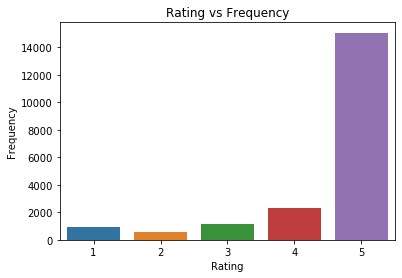

Rating and Frequency:
5    15059
4     2330
3     1119
1      940
2      552
Name: rating, dtype: int64


In [6]:
rating_countplot = sns.countplot(x='rating', data=review_data)
rating_countplot.set(
    title='Rating vs Frequency',
    xlabel='Rating',
    ylabel='Frequency'
)
plt.show()

print("Rating and Frequency:\n", review_data['rating'].value_counts(), sep='')

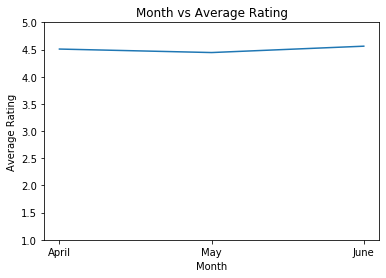

month  mean_rating
0  April     4.508805
1    May     4.444655
2   June     4.561653

In [7]:
# .dt.strftime('%B') returns month as a string but results in different order
review_data['month'] = datetime_created.dt.month 

month_numbers = review_data['month'].sort_values().unique()
mean_ratings = [
    get_mean_rating_for_month(review_data, month_number) 
    for month_number in month_numbers
]
month_names = [
    calendar.month_name[month_number] 
    for month_number in month_numbers
]

mean_monthly_rating_plot = sns.lineplot(
    x=month_names, 
    y=mean_ratings, 
    sort=False
)
mean_monthly_rating_plot.set(
    title='Month vs Average Rating',
    xlabel='Month',
    ylabel='Average Rating'
)
plt.ylim(1, 5) # misleading without limits
plt.show()

pd.DataFrame(
    data=zip(month_names, mean_ratings), 
    columns=['month', 'mean_rating']
)

Plotting the mean monthly ratings show that they are relatively similar and below the true mean of 4.7 stars in the Google Play Store.

In [8]:
connection.close()
engine.dispose()